<a href="https://colab.research.google.com/github/janepu47/229352/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_Lab06_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Support Vector Machines (SVM)

[SVM module documentation](https://scikit-learn.org/stable/modules/svm.html#svm)

[LinearSVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)

[SVC documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # fast but only linear
from sklearn.svm import SVC  # slower but can do kernels

In [14]:
# Load the iris data
iris = datasets.load_iris()
X = iris.data[:, 2:]
y = iris.target

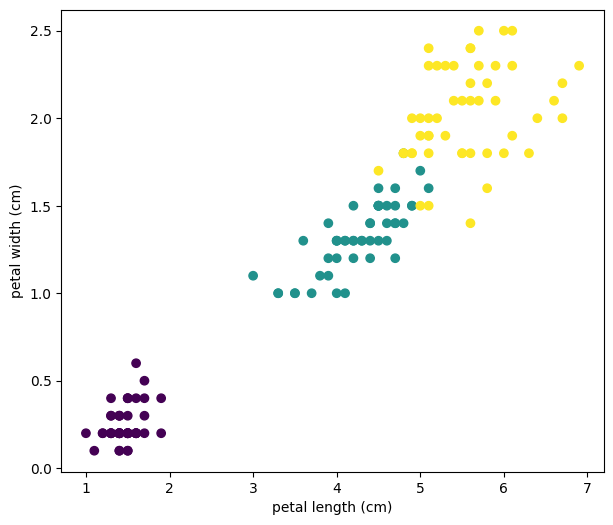

In [15]:
# Plot the data
plt.figure(figsize=(7,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])
plt.show()

#### In this problem, you'll use support vector machines to classify the Iris data

#### The following function helps you plot the decision boundary.

In [16]:
# Plot the decision boundaries
def plot_decision_boundary(clf, X, y):
    h = 0.005  # Boundary lines' resolution
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.25)  # Background
    plt.contour(xx, yy, Z, colors='k', linewidths=0.2)  # Boundary lines
    plt.scatter(X[:,0], X[:,1], c=y);  # Data points
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])

#### Exercise 1. Split the data into training set and test set.

In [17]:
#TODO
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Exercise 2. Learn a linear SVM classifier using sklearn.svm.LinearSVC. You will need to set `loss='hinge'`.

#### Try different values of the tradeoff parameter: `C = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `C` on the decision boundary?

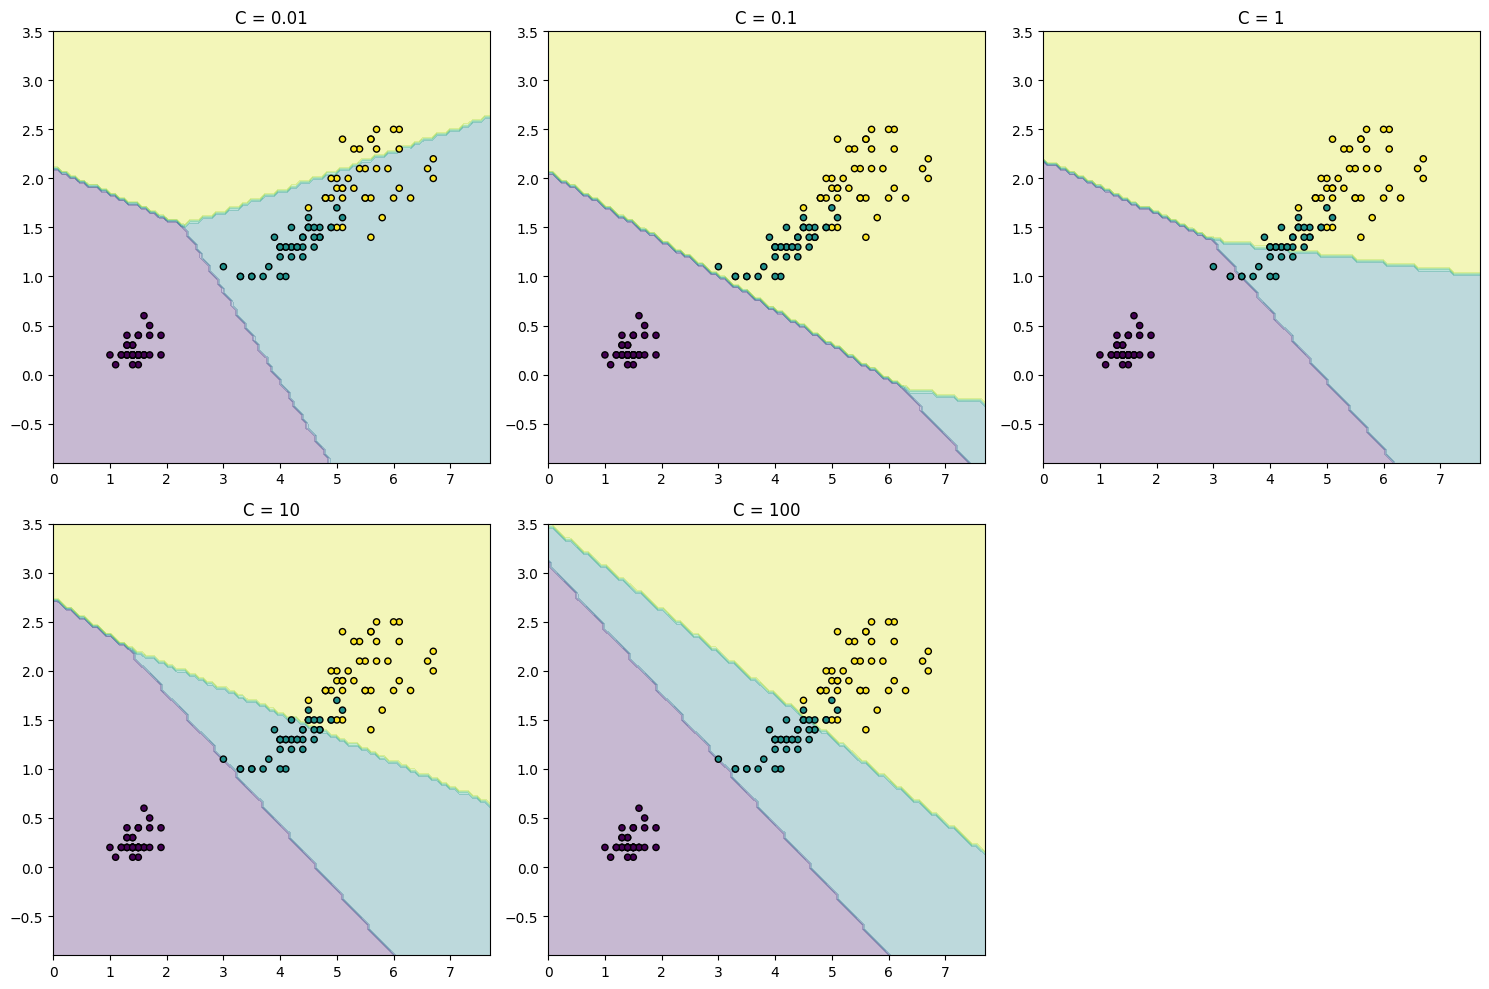

In [19]:
#TODO
plt.figure(figsize=(15, 10))
C_values = [0.01, 0.1, 1, 10, 100] # Define C_values

for i, C in enumerate(C_values): # Use C_values

    model = LinearSVC(C=C, loss='hinge', max_iter=100000)
    model.fit(X_train, y_train)

    # เตรียมข้อมูลสำหรับ decision boundary
    x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
    y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.subplot(2, 3, i+1)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                edgecolor='k', s=20, cmap='viridis')
    plt.title(f'C = {C}')
    plt.grid(False)  # ปิดเส้นกริด
    plt.axis('tight')  # ปรับแกนให้พอดี


if len(C_values) < 6:
    for j in range(len(C_values)+1, 7):
        plt.subplot(2, 3, j)
        plt.axis('off')

plt.tight_layout()
plt.show()

- C ต่ำ (เช่น 0.01): โมเดล ยอมให้บางจุดถูกจำแนกผิด เพื่อให้ เส้นแบ่งเรียบง่าย และ ระยะห่างระหว่างคลาสกว้าง เหมาะสำหรับข้อมูลที่มี noise หรือ ป้องกัน overfitting

- C สูง (เช่น 100): โมเดล พยายามจำแนกทุกจุดให้ถูกต้อง แม้ต้องใช้ เส้นแบ่งคดเคี้ยว และ margin แคบ เสี่ยง overfitting ถ้าข้อมูลมี noise

#### Exercise 3. Pick a value of `C` that you like. Then report the test error.

In [20]:
#TODO
from sklearn.metrics import accuracy_score

# ฝึกโมเดลด้วย C=1
model = LinearSVC(C=1, loss='hinge', max_iter=100000)
model.fit(X_train, y_train)

# คำนวณ Test Error (1 - Test Accuracy)
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

print(f"Test Error (C=1): {test_error:.4f} หรือ {test_error*100:.2f}%")

Test Error (C=1): 0.1667 หรือ 16.67%


#### Exercise 4. Now try kernel SVM with a quadratic kernel. You can do this with sklearn.svm.SVC, setting `kernel='rbf'` and `C = 1.0`.

#### Try different values of the tradeoff parameter: `gamma = 0.01, 0.1, 1.0, 10.0, 100.0` and use `plot_decision_boundary` to plot the decision boundary.

#### If you encounter `RuntimeError`, consider setting `max_iter=100000`

#### What is the effect of `gamma` on the decision boundary?

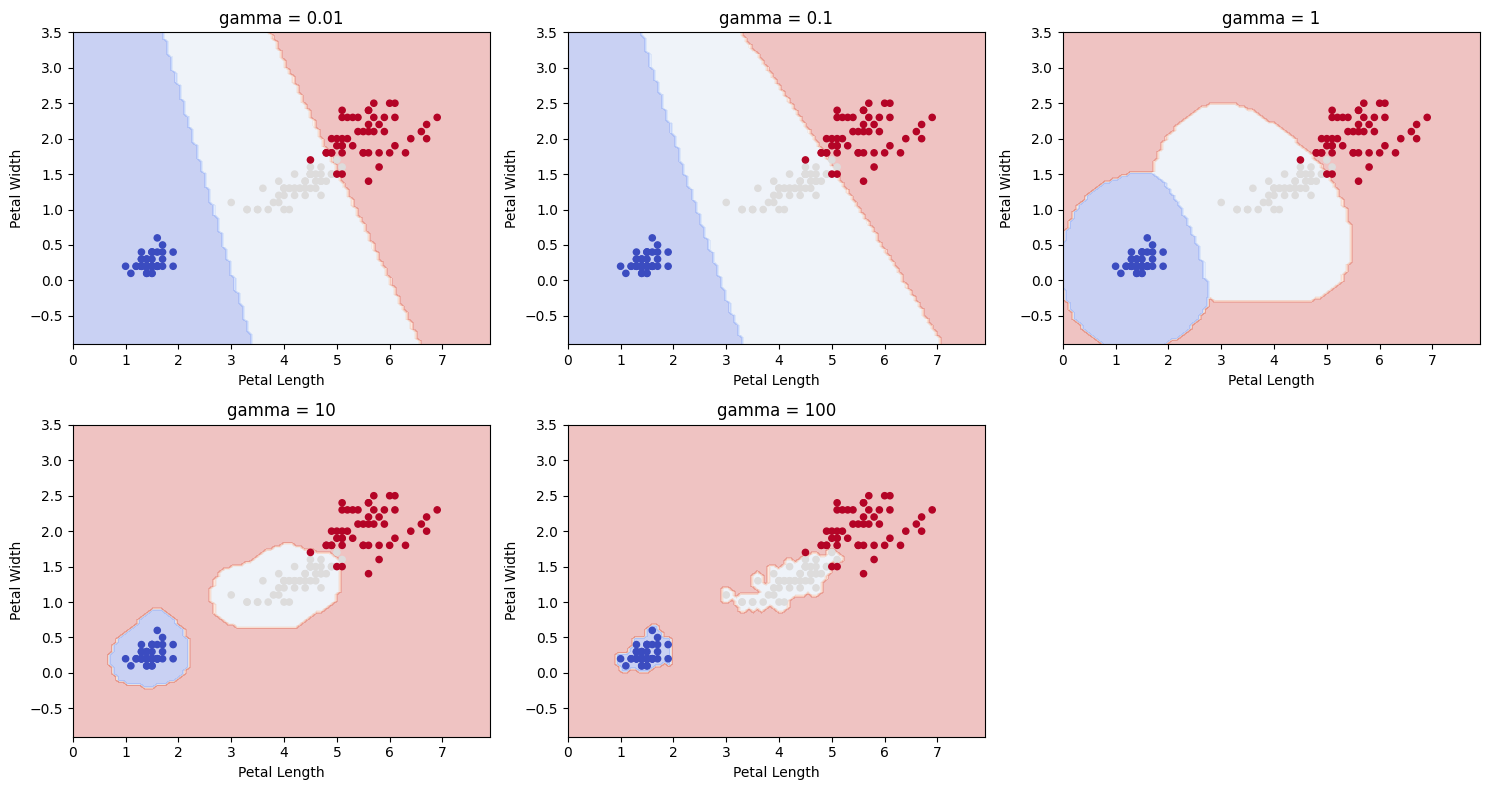

In [21]:
#TODO
gamma_values = [0.01, 0.1, 1, 10, 100]


plt.figure(figsize=(15, 8))

for i, gamma in enumerate(gamma_values):

    model = SVC(kernel='rbf', C=1.0, gamma=gamma)
    model.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    plt.subplot(2, 3, i+1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap='coolwarm')
    plt.title(f'gamma = {gamma}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')

plt.tight_layout()
plt.show()

- ค่า gamma ต่ำมาก (เช่น 0.01)	เส้นแบ่งเกือบเป็นเส้นตรง เรียบมาก	ไม่สนใจรายละเอียดเล็กๆ โฟกัสที่รูปแบบกว้างๆ	อาจทำให้เกิด Underfitting
- ค่า gamma ปานกลาง (เช่น 1)	เส้นแบ่งโค้งได้ตามธรรมชาติและมีความสมดุล
- ค่า gamma สูงมาก (เช่น 100)	เส้นแบ่งคดเคี้ยวตามจุดข้อมูลทุกจุด	พยายามจำแนกทุกจุดในข้อมูล อาจเกิด	Overfitting

#### Exercise 5. Pick a value of `gamma` that you like. Then report the test error and the number of support vectors.

In [22]:
#TODO
model = SVC(kernel='rbf', C=1, gamma=1, random_state=42)
model.fit(X_train, y_train)

# ทำนายผลและคำนวณ Test Error
y_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
test_error = 1 - test_accuracy

# นับจำนวน Support Vectors
num_support_vectors = len(model.support_vectors_)

print(f"Test Error (gamma=1): {test_error:.4f} หรือ {test_error*100:.2f}%")
print(f"จำนวน Support Vectors: {num_support_vectors}")

Test Error (gamma=1): 0.0000 หรือ 0.00%
จำนวน Support Vectors: 30


#### Exercise 6. Between Linear SVM and Kernel SVM, which model would you prefer to use for classification of Iris data?
1. Explain using test accuracy
2. Explaing using decision boundary plot

In [27]:
#TODO
# Linear SVM
linear_model = LinearSVC(max_iter=10000)
linear_model.fit(X_train, y_train)
print("Linear SVM Accuracy:", linear_model.score(X_test, y_test))

# Kernel SVM (RBF)
rbf_model = SVC(kernel='rbf')
rbf_model.fit(X_train, y_train)
print("Kernel  SVM Accuracy:", rbf_model.score(X_test, y_test))

Linear SVM Accuracy: 0.9666666666666667
Kernel  SVM Accuracy: 1.0


เลือก Kernal SVM เพราะให้ค่า accuracy สูงกว่า

<Figure size 800x600 with 0 Axes>

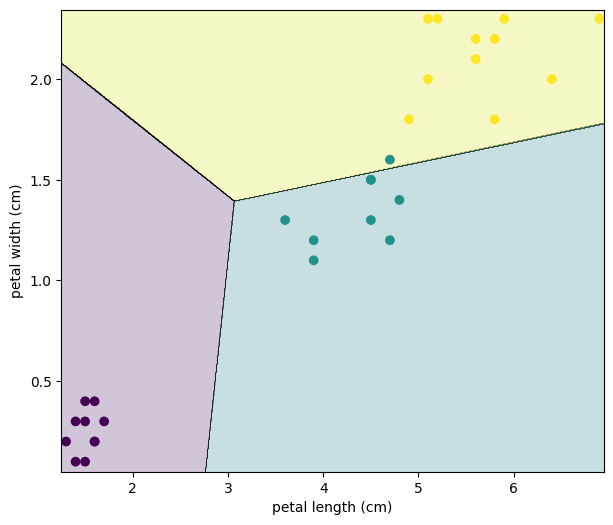

In [24]:
# Plot สำหรับ Linear SVM
plt.figure(figsize=(8,6))
plot_decision_boundary(linear_model, X_test, y_test)
plt.show()

<Figure size 800x600 with 0 Axes>

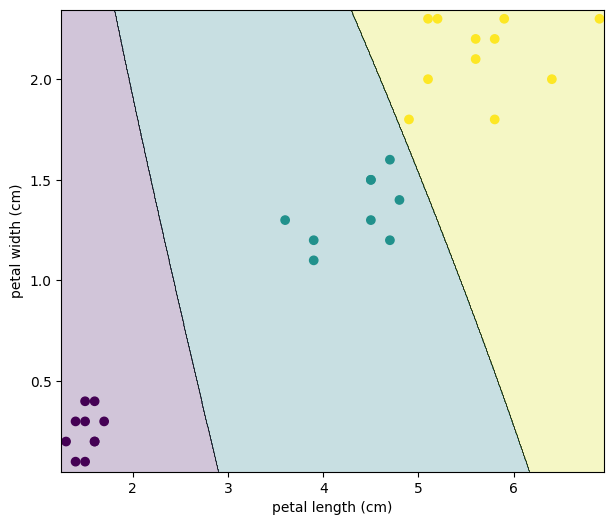

In [26]:
# Plot สำหรับ Kernel  SVM ที่ปรับ gamma
plt.figure(figsize=(8,6))
plot_decision_boundary(rbf_model, X_test, y_test)
plt.show()

เลือก Kernel SVM เพราะเส้นแบ่งการตัดสินใจมีความโค้งและสามารถปรับให้เข้ากับรูปแบบของข้อมูลได้ดีกว่า ทำให้สามารถแยกกลุ่มข้อมูลทั้งสามได้อย่างชัดเจน